<a href="https://colab.research.google.com/github/RylieWeaver/Hyperparameter-Optimization/blob/main/Hyperparameter_Colorplotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hyperparameter Colorplotting

Not Implementing DEAP, but investigating some basic hyperparameter colormapping with MNIST and Neural Networks

### One Model

In [ ]:
# Required Libraries
import tensorflow as tf

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Flatten images into one-dimensional vector
num_pixels = x_train.shape[1] * x_train.shape[2]  # find size of one-dimensional vector

# Normalize inputs from 0-255 to 0-1
x_train = x_train.reshape((x_train.shape[0], num_pixels)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], num_pixels)).astype('float32') / 255

# one hot encode outputs
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)
num_classes = y_test.shape[1]  # number of categories

# Define the neural network model
def create_model():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(784, input_dim=num_pixels, activation='relu'))
    model.add(tf.keras.layers.Dense(16, activation='relu'))
    model.add(tf.keras.layers.Dense(16, activation='relu'))
    model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Build the model
model = create_model()

# Create a checkpoint to save the best model
checkpoint = tf.keras.callbacks.ModelCheckpoint('best_model.h5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

# Fit the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=200, callbacks=[checkpoint])

# Load the saved model
saved_model = tf.keras.models.load_model('best_model.h5')

# Final evaluation of the model
scores = saved_model.evaluate(x_test, y_test, verbose=0)
print("Best Accuracy: {:.2f}%".format(scores[1]*100))

Epoch 1/10
300/300 [==============================] - ETA: 0s - loss: 0.4638 - accuracy: 0.8587
Epoch 1: val_accuracy improved from -inf to 0.95250, saving model to best_model.h5
300/300 [==============================] - 22s 58ms/step - loss: 0.4638 - accuracy: 0.8587 - val_loss: 0.1627 - val_accuracy: 0.9525
Epoch 2/10
300/300 [==============================] - ETA: 0s - loss: 0.1318 - accuracy: 0.9627
Epoch 2: val_accuracy improved from 0.95250 to 0.96420, saving model to best_model.h5
300/300 [==============================] - 11s 37ms/step - loss: 0.1318 - accuracy: 0.9627 - val_loss: 0.1134 - val_accuracy: 0.9642
Epoch 3/10
299/300 [============================>.] - ETA: 0s - loss: 0.0857 - accuracy: 0.9747
Epoch 3: val_accuracy improved from 0.96420 to 0.96940, saving model to best_model.h5
300/300 [==============================] - 9s 28ms/step - loss: 0.0857 - accuracy: 0.9747 - val_loss: 0.1008 - val_accuracy: 0.9694
Epoch 4/10
298/300 [============================>.] - ETA: 

### 4x4 Models from 1-4

Accuracy with layer1_size=1, layer2_size=1: 43.91%
Accuracy with layer1_size=1, layer2_size=2: 45.38%
Accuracy with layer1_size=1, layer2_size=3: 11.35%
Accuracy with layer1_size=1, layer2_size=4: 32.48%
Accuracy with layer1_size=2, layer2_size=1: 43.88%
Accuracy with layer1_size=2, layer2_size=2: 45.59%
Accuracy with layer1_size=2, layer2_size=3: 94.49%
Accuracy with layer1_size=2, layer2_size=4: 85.69%
Accuracy with layer1_size=3, layer2_size=1: 43.01%
Accuracy with layer1_size=3, layer2_size=2: 40.67%
Accuracy with layer1_size=3, layer2_size=3: 96.05%
Accuracy with layer1_size=3, layer2_size=4: 84.92%
Accuracy with layer1_size=4, layer2_size=1: 45.82%
Accuracy with layer1_size=4, layer2_size=2: 92.01%
Accuracy with layer1_size=4, layer2_size=3: 94.53%
Accuracy with layer1_size=4, layer2_size=4: 94.31%


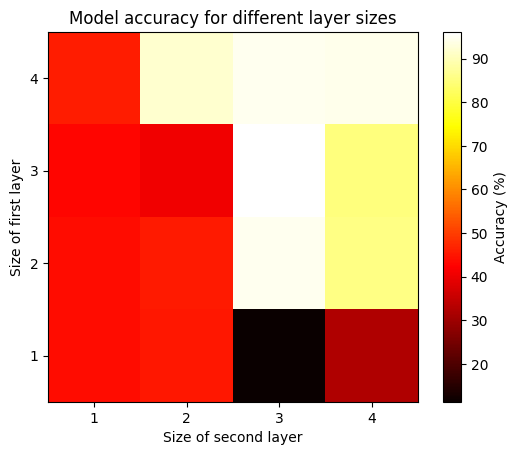

In [ ]:
# Required Libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Flatten images into one-dimensional vector
num_pixels = x_train.shape[1] * x_train.shape[2]  # find size of one-dimensional vector

# Normalize inputs from 0-255 to 0-1
x_train = x_train.reshape((x_train.shape[0], num_pixels)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], num_pixels)).astype('float32') / 255

# one hot encode outputs
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)
num_classes = y_test.shape[1]  # number of categories

# Define the neural network model
def create_model(layer1_size, layer2_size):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(784, input_dim=num_pixels, activation='relu'))
    model.add(tf.keras.layers.Dense(layer1_size, activation='relu'))
    model.add(tf.keras.layers.Dense(layer2_size, activation='relu'))
    model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

layer_sizes = [1, 2, 3, 4]
results = np.zeros((4, 4))

# Iterate over all combinations of layer sizes
for i in range(4):
    for j in range(4):
        # Build the model
        model = create_model(layer_sizes[i], layer_sizes[j])

        # Fit the model
        model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=200, verbose=0)

        # Final evaluation of the model
        scores = model.evaluate(x_test, y_test, verbose=0)
        results[i, j] = scores[1]*100
        print(f"Accuracy with layer1_size={layer_sizes[i]}, layer2_size={layer_sizes[j]}: {results[i, j]:.2f}%")

# Plot the results
plt.imshow(results[::-1], cmap='hot', interpolation='nearest')  # Flip the results vertically
plt.colorbar(label='Accuracy (%)')
plt.xticks(np.arange(4), layer_sizes)
plt.yticks(np.arange(4), layer_sizes[::-1])  # Flip the y-axis labels
plt.xlabel('Size of second layer')
plt.ylabel('Size of first layer')
plt.title('Model accuracy for different layer sizes')
plt.show()

### 4x4 Models of Powers of 4

Accuracy with layer1_size=4, layer2_size=4: 95.86%
Accuracy with layer1_size=4, layer2_size=16: 97.13%
Accuracy with layer1_size=4, layer2_size=64: 97.14%
Accuracy with layer1_size=4, layer2_size=256: 97.21%
Accuracy with layer1_size=16, layer2_size=4: 96.71%
Accuracy with layer1_size=16, layer2_size=16: 97.89%
Accuracy with layer1_size=16, layer2_size=64: 97.77%
Accuracy with layer1_size=16, layer2_size=256: 98.07%
Accuracy with layer1_size=64, layer2_size=4: 97.93%
Accuracy with layer1_size=64, layer2_size=16: 98.01%
Accuracy with layer1_size=64, layer2_size=64: 98.04%
Accuracy with layer1_size=64, layer2_size=256: 97.89%
Accuracy with layer1_size=256, layer2_size=4: 97.80%
Accuracy with layer1_size=256, layer2_size=16: 98.00%
Accuracy with layer1_size=256, layer2_size=64: 97.98%
Accuracy with layer1_size=256, layer2_size=256: 98.17%


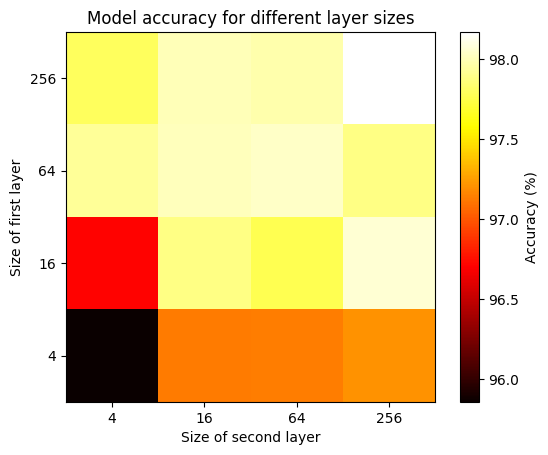

In [ ]:
# Required Libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Flatten images into one-dimensional vector
num_pixels = x_train.shape[1] * x_train.shape[2]  # find size of one-dimensional vector

# Normalize inputs from 0-255 to 0-1
x_train = x_train.reshape((x_train.shape[0], num_pixels)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], num_pixels)).astype('float32') / 255

# one hot encode outputs
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)
num_classes = y_test.shape[1]  # number of categories

# Define the neural network model
def create_model(layer1_size, layer2_size):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(784, input_dim=num_pixels, activation='relu'))
    model.add(tf.keras.layers.Dense(layer1_size, activation='relu'))
    model.add(tf.keras.layers.Dense(layer2_size, activation='relu'))
    model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

layer_sizes = [4, 16, 64, 256]
results = np.zeros((4, 4))

# Iterate over all combinations of layer sizes
for i in range(4):
    for j in range(4):
        # Build the model
        model = create_model(layer_sizes[i], layer_sizes[j])

        # Create EarlyStopping
        early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

        # Fit the model
        model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=200, callbacks=[early_stopping], verbose=0)

        # Final evaluation of the model
        scores = model.evaluate(x_test, y_test, verbose=0)
        results[i, j] = scores[1]*100
        print(f"Accuracy with layer1_size={layer_sizes[i]}, layer2_size={layer_sizes[j]}: {results[i, j]:.2f}%")

# Plot the results
plt.imshow(results[::-1], cmap='hot', interpolation='nearest')  # Flip the results vertically
plt.colorbar(label='Accuracy (%)')
plt.xticks(np.arange(4), layer_sizes)
plt.yticks(np.arange(4), layer_sizes[::-1])  # Flip the y-axis labels
plt.xlabel('Size of second layer')
plt.ylabel('Size of first layer')
plt.title('Model accuracy for different layer sizes')
plt.show()

### Model 4x4 Big

Accuracy with layer1_size=256, layer2_size=256: 98.17%
Accuracy with layer1_size=256, layer2_size=512: 98.16%
Accuracy with layer1_size=256, layer2_size=718: 97.83%
Accuracy with layer1_size=256, layer2_size=1024: 97.41%
Accuracy with layer1_size=512, layer2_size=256: 97.78%
Accuracy with layer1_size=512, layer2_size=512: 97.91%
Accuracy with layer1_size=512, layer2_size=718: 97.96%
Accuracy with layer1_size=512, layer2_size=1024: 98.05%
Accuracy with layer1_size=718, layer2_size=256: 98.01%
Accuracy with layer1_size=718, layer2_size=512: 98.09%
Accuracy with layer1_size=718, layer2_size=718: 97.91%
Accuracy with layer1_size=718, layer2_size=1024: 98.10%
Accuracy with layer1_size=1024, layer2_size=256: 98.19%
Accuracy with layer1_size=1024, layer2_size=512: 97.58%
Accuracy with layer1_size=1024, layer2_size=718: 97.90%
Accuracy with layer1_size=1024, layer2_size=1024: 97.85%


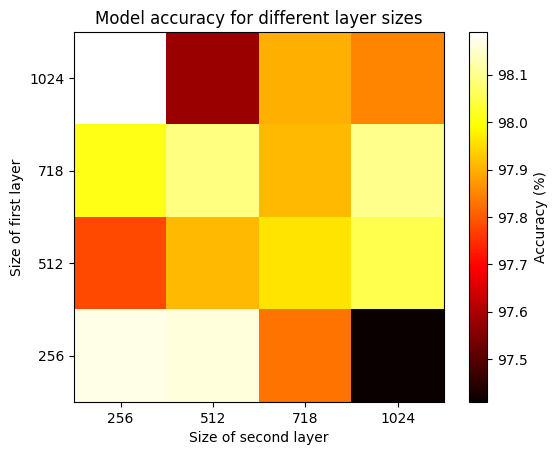

In [ ]:
# Required Libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Flatten images into one-dimensional vector
num_pixels = x_train.shape[1] * x_train.shape[2]  # find size of one-dimensional vector

# Normalize inputs from 0-255 to 0-1
x_train = x_train.reshape((x_train.shape[0], num_pixels)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], num_pixels)).astype('float32') / 255

# one hot encode outputs
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)
num_classes = y_test.shape[1]  # number of categories

# Define the neural network model
def create_model(layer1_size, layer2_size):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(784, input_dim=num_pixels, activation='relu'))
    model.add(tf.keras.layers.Dense(layer1_size, activation='relu'))
    model.add(tf.keras.layers.Dense(layer2_size, activation='relu'))
    model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

layer_sizes = [256, 512, 718, 1024]
results = np.zeros((4, 4))

# Iterate over all combinations of layer sizes
for i in range(4):
    for j in range(4):
        # Build the model
        model = create_model(layer_sizes[i], layer_sizes[j])

        # Create EarlyStopping
        early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

        # Fit the model
        model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=200, callbacks=[early_stopping], verbose=0)

        # Final evaluation of the model
        scores = model.evaluate(x_test, y_test, verbose=0)
        results[i, j] = scores[1]*100
        print(f"Accuracy with layer1_size={layer_sizes[i]}, layer2_size={layer_sizes[j]}: {results[i, j]:.2f}%")

# Plot the results
plt.imshow(results[::-1], cmap='hot', interpolation='nearest')  # Flip the results vertically
plt.colorbar(label='Accuracy (%)')
plt.xticks(np.arange(4), layer_sizes)
plt.yticks(np.arange(4), layer_sizes[::-1])  # Flip the y-axis labels
plt.xlabel('Size of second layer')
plt.ylabel('Size of first layer')
plt.title('Model accuracy for different layer sizes')
plt.show()